In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import xarray as xr

from icon_smt_levels import dzw, dzt, depthc, depthi

xarray
done xarray


In [3]:
def savefig(txt, dpi=150, format='pdf'):
    fbase = nb_name.split('/')[-1][:-6]
    fpath = f'{path_fig}{fbase}_{txt}.{format}'
    plt.savefig(fpath, dpi=dpi)
    print('saved figure: %s' % (fpath))
    return

In [4]:
run = 'ngSMT_tke'
savefig = True
path_fig = '../pics/'
nnf=0

gname = 'smt'
lev = 'L128'

path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
fpath_tgrid = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
fpath_Tri = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [5]:
lon_reg = [-75, -55]
lat_reg = [33, 43]
lon_reg2 = [-77, -62]
lat_reg2 = [29, 43]
lon_regm = [-65, -64]
lat_regm = [39.4, 40.2]
lon_regm2 = [-65, -60]
lat_regm2 = [38, 40]
lon_regs = [-64.8, -64.6]
lat_regs = [39.6, 39.8]


In [27]:
# load calculated
path_data = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/ngSMT_tke_vort_f_50m_20100301T010000Z.nc'
ds_vort      = xr.open_dataset(path_data)
vort         = ds_vort.vort_f_cells_50m.isel(time=0)
ds_vort.time.isel(time=0)

<xarray.DataArray 'time' ()>
array(20100301.04166667)
Coordinates:
    time     float64 2.01e+07
Attributes:
    standard_name:  time
    calendar:       proleptic_gregorian
    axis:           T
    units:          day as %Y%m%d.%f

In [11]:
vort

<xarray.DataArray 'vort_f_cells_50m' (ncells: 59799625)>
[59799625 values with dtype=float32]
Coordinates:
    time     float64 2.01e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                vort_f_cells_50m
    long_name:                    vorticity/coriolis on cells at 50m
    units:                        m/s
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

## plot on triangular grid

In [69]:
lon_reg2 = [-77, -57]
lat_reg2 = [32, 41]
print('Deriving triangulation object, this can take a while...')
f = Dataset('/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc', 'r')
clon = f.variables['clon'][:] * 180./np.pi
clat = f.variables['clat'][:] * 180./np.pi
vlon = f.variables['vlon'][:] * 180./np.pi
vlat = f.variables['vlat'][:] * 180./np.pi
vertex_of_cell = f.variables['vertex_of_cell'][:].transpose()-1
f.close()

ind_reg = np.where(   (clon>lon_reg2[0])
                    & (clon<=lon_reg2[1])
                    & (clat>lat_reg2[0])
                    & (clat<=lat_reg2[1]) )[0]
vertex_of_cell_reg = vertex_of_cell[ind_reg,:]
Tri = matplotlib.tri.Triangulation(vlon, vlat, triangles=vertex_of_cell_reg)
data_reg = vort.compute().data[ind_reg]
print('Done deriving triangulation object.')

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


In [47]:
9/20


0.45

toi.min() -7.817202
toi.max() 8.011386


<IPython.core.display.Javascript object>


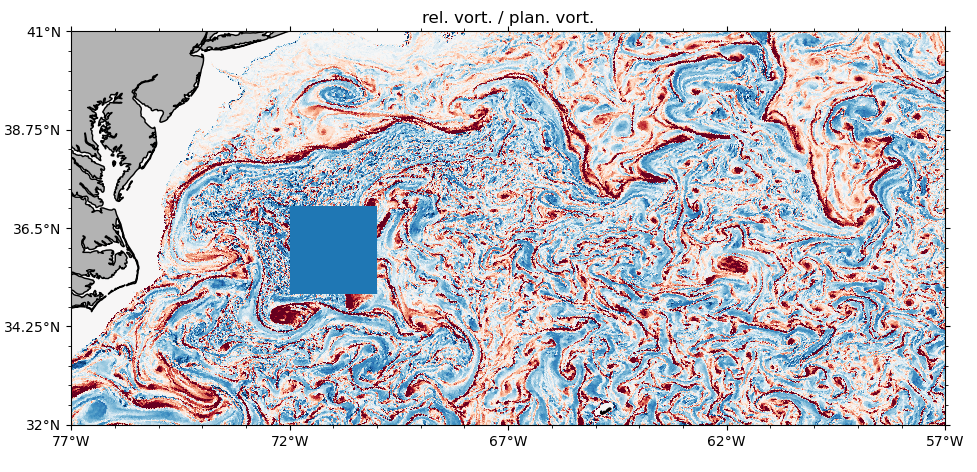

In [72]:
ccrs_proj = ccrs.PlateCarree()
lon_reg2 = [-77, -57]
lat_reg2 = [32, 41]
lon_regm2 = [-72, -70]
lat_regm2 = [35, 37]
toi = data_reg
lon = lon_reg2
lat = lat_reg2

print('toi.min()', toi.min()); print('toi.max()', toi.max())    
clim = -0.15*toi.min()

hca, hcb = pyic.arrange_axes(1,1, plot_cb=False, asp=0.45, fig_size_fac=2.5, projection=ccrs_proj, axlab_kw=None)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
#pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))
pyic.shade(Tri, toi, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False) # , clim=(-a*tm,a*tm)
#ax.add_patch(Rectangle(xy=[lon_regm2[0], lat_regm2[0]], width=2, height=2))
#plt.tight_layout()
#plt.colorbar.remove()
ax.set_xlim(lon)
ax.set_ylim(lat)
ax.set_title('rel. vort. / plan. vort.')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon, ylim=lat)
    
plt.savefig('../pics/vorticity_l.png', dpi=500)

In [15]:
#savefig('vorticity', format='pdf')
plt.savefig('name.png', dpi=300)

toi.min() -3.6141176
toi.max() 8.011386


<IPython.core.display.Javascript object>


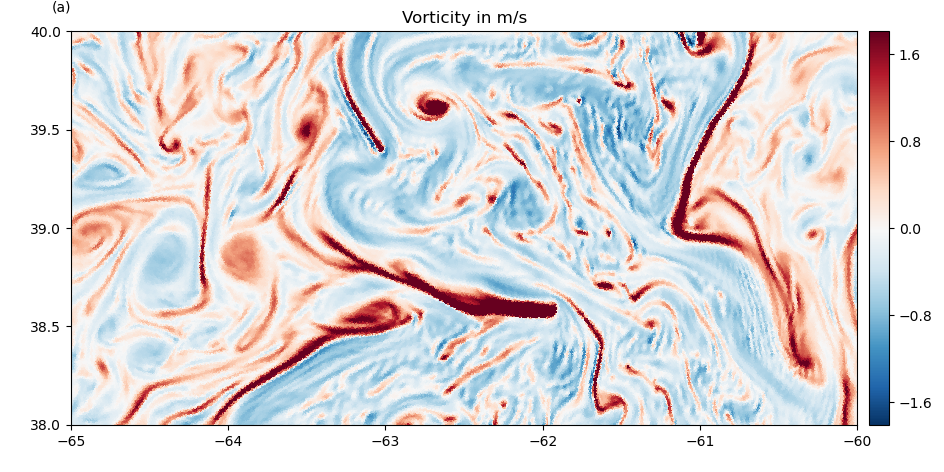

Text(0.5, 1.0, 'Vorticity in m/s')

In [29]:
ccrs_proj = ccrs.PlateCarree()
toi = data_reg
lon = lon_regm2
lat = lat_regm2

a=0.1
if abs(toi.min()) < abs(toi.max()) :
    tm = abs(toi.min())
else :
    tm = abs(toi.max())

print('toi.min()', toi.min()); print('toi.max()', toi.max())    


hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
#pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))
pyic.shade(Tri, toi, ax=ax, cax=cax, clim=-0.5*toi.min(), cmap='RdYlBu') # , clim=(-a*tm,a*tm)
ax.set_xlim(lon)
ax.set_ylim(lat)
ax.set_title('Vorticity in m/s')

## calculate Tw

In [6]:
path_data = '/scratch/u/u241317/calc/pp_calc_w_n.nc'
ds_w      = xr.open_dataset(path_data)
w         = ds_w.w.isel(depthi=16)
depthi[16]

50.0

In [7]:
path_data = '/scratch/u/u241317/calc/pp_calc_T_interp.nc'
ds_T      = xr.open_dataset(path_data)
T         = ds_T.T.isel(depthi=16)
depthi[16]

50.0

## callculate surfaces

In [15]:
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
cell_area_p = f.variables['cell_area_p'][:] # area of grid cell 
f.close()

In [18]:
cell_area_p[20000]

323802.27523059276

In [30]:
rho0  = 1025.022
cp    = 4184
K     = 273.15

In [31]:
T = T.data + K

In [32]:
#Tw = xr.DataArray(T.data * w.data)
Tw = xr.DataArray(T * w.data * cp * rho0 / cell_area_p.data)

In [33]:
lon_regm2 = [-72, -68]
lat_regm2 = [35, 37]
print('Deriving triangulation object, this can take a while...')
f = Dataset('/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc', 'r')
clon = f.variables['clon'][:] * 180./np.pi
clat = f.variables['clat'][:] * 180./np.pi
vlon = f.variables['vlon'][:] * 180./np.pi
vlat = f.variables['vlat'][:] * 180./np.pi
vertex_of_cell = f.variables['vertex_of_cell'][:].transpose()-1
f.close()

ind_reg = np.where(   (clon>lon_regm2[0])
                    & (clon<=lon_regm2[1])
                    & (clat>lat_regm2[0])
                    & (clat<=lat_regm2[1]) )[0]
vertex_of_cell_reg = vertex_of_cell[ind_reg,:]
Tri = matplotlib.tri.Triangulation(vlon, vlat, triangles=vertex_of_cell_reg)
data_reg2 = Tw.compute().data[ind_reg]
print('Done deriving triangulation object.')

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


toi.min() -1044.6725959249575
toi.max() 659.0714953203084


<IPython.core.display.Javascript object>


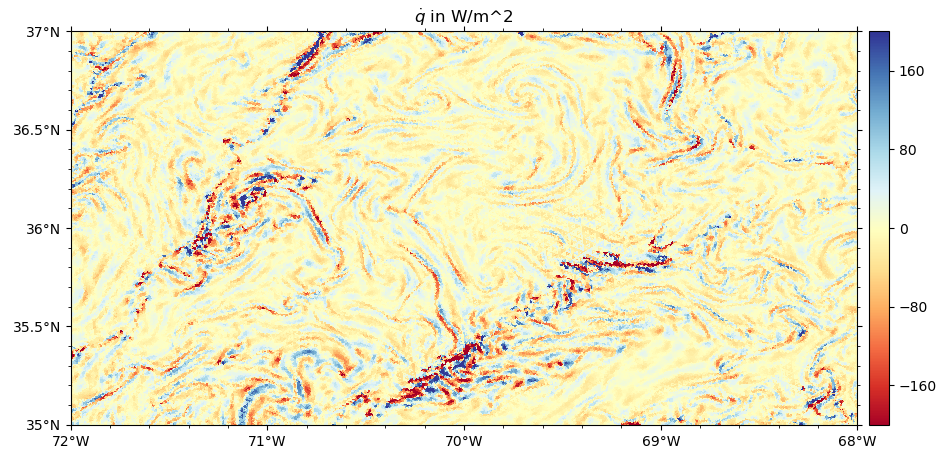

In [43]:
ccrs_proj = ccrs.PlateCarree()


lon_regm2 = [-64, -60.5]
lat_regm2 = [38, 39.5]
lon_regm2 = [-72, -68]
lat_regm2 = [35, 37]
toi = data_reg2
lon = lon_regm2
lat = lat_regm2

print('toi.min()', toi.min()); print('toi.max()', toi.max())    
clim = 200

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=ccrs_proj, axlab_kw=None)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
#pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))
pyic.shade(Tri, toi, ax=ax, cax=cax, clim=clim, cmap='RdYlBu', transform=ccrs_proj, rasterized=False) # , clim=(-a*tm,a*tm)
#ax.add_patch(Rectangle((-71, 35.5), 2, 0.5),
#              edgecolor='k',
#              facecolor='none',
#              linewidth=2,
#              transform=ccrs_proj))
ax.set_xlim(lon)
ax.set_ylim(lat)
ax.set_title('$\dot{q}$ in W/m^2')
#cax.set_ylabel('$\dot{q} \frac{\mathrm{W}}{\mathrm{m}^2}$')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon, ylim=lat)
    
plt.savefig('../pics/vertical_heat.png', dpi=400)


In [36]:
print('Deriving triangulation object, this can take a while...')
f = Dataset('/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc', 'r')
clon = f.variables['clon'][:] * 180./np.pi
clat = f.variables['clat'][:] * 180./np.pi
vlon = f.variables['vlon'][:] * 180./np.pi
vlat = f.variables['vlat'][:] * 180./np.pi
vertex_of_cell = f.variables['vertex_of_cell'][:].transpose()-1
f.close()

ind_reg = np.where(   (clon>lon_reg2[0])
                    & (clon<=lon_reg2[1])
                    & (clat>lat_reg2[0])
                    & (clat<=lat_reg2[1]) )[0]
vertex_of_cell_reg = vertex_of_cell[ind_reg,:]
Tri = matplotlib.tri.Triangulation(vlon, vlat, triangles=vertex_of_cell_reg)
data_reg3 = Tw.compute().data[ind_reg]
print('Done deriving triangulation object.')

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


toi.min() -5.9963365
toi.max() 5.08988


<IPython.core.display.Javascript object>


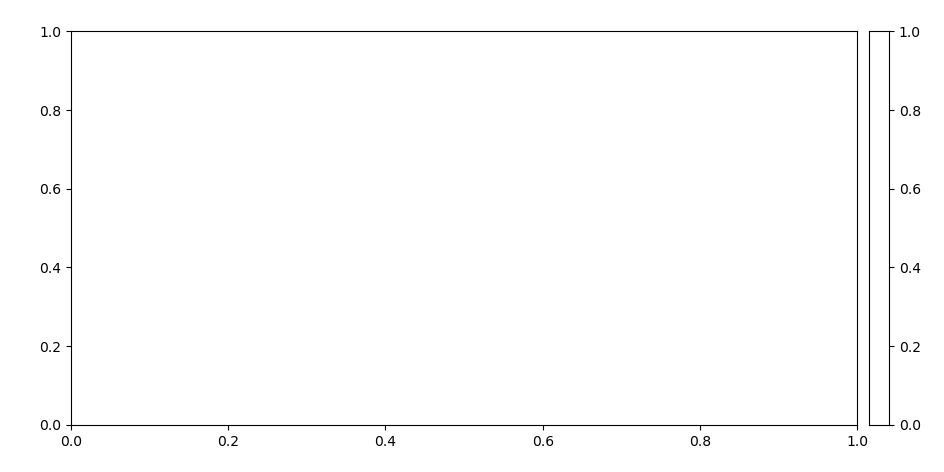

ValueError: Length of color values array must be the same as either the number of triangulation points or triangles

In [51]:
lon_regm2 = [-64, -60.5]
lat_regm2 = [38, 39.5]
toi = data_reg3
lon = lon_reg2
lat = lat_reg2

a=0.1
if abs(toi.min()) < abs(toi.max()) :
    tm = abs(toi.min())
else :
    tm = abs(toi.max())

print('toi.min()', toi.min()); print('toi.max()', toi.max())    
clim = -0.03*toi.min()

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, axlab_kw=None)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
#pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))
pyic.shade(Tri, toi, ax=ax, cax=cax, clim=clim, cmap='RdYlBu') # , clim=(-a*tm,a*tm)
#ax.add_patch(Rectangle((-63, 38.5), 2, 0.5))
ax.set_xlim(lon)
ax.set_ylim(lat)
ax.set_title('Tw')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon, ylim=lat)
    
plt.savefig('../pics/vertical_heat_big.png', dpi=500)